In [1]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
#from matplotlib_venn import venn2
#for my windows10 laptop I had to install this package using pip rather than anaconda.  
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
import pickle
import subprocess
#import networkx as nx
import scipy.stats as stats
#import statsmodels.api as sm
#import scipy.spatial.distance as spd
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

from Bio import SeqIO
from Bio import SeqFeature as sf
#from Bio.Alphabet import generic_dna
#from Bio.Seq import Seq
import gffutils

import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No ")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
from ete3 import Tree, SeqMotifFace, TreeStyle, add_face_to_node  #the last three are for visualization
# In order to view ete3 created trees on the gpucluster, you need to use a virtual X server:
#from pyvirtualdisplay import Display
#display = Display(visible=False, size=(1024, 768), color_depth=24)
#display.start()
#ete3 is not officially supported on windows, and so must be loaded via pip: 
# pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip
# ref: https://groups.google.com/forum/#!topic/etetoolkit/6NblSBPij4o

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

spec_lookup = {'Klac' : 'Kluyveromyces lactis', 'Scer': 'Saccharomyces cerevisiae', 
 'Cgla' : 'Candida glabrata' , 'Ncas': 'Naumovozyma castellii', 
 'Sbay' : 'Saccharomyces bayanus', 'Smik': 'Saccharomyces mikatae',
 'Lwal' : 'Lachancea waltii', 'Spar' : 'Saccharomyces paradoxus', 
 'Lklu' : 'Lachancea kluyverii', 'Dhan': 'Debaryomyces hansenii', 
 'Calb' : 'Candida albicans', 'Ylip': 'Yarrowia lipolytica'}

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
Added C:\Users\BMH_work\github\expression_broad_data to path: 
['', 'C:\\Users\\BMH_work\\github\\expression_broad_data\\scripts', 'C:\\Users\\BMH_work\\Anaconda3\\python37.zip', 'C:\\Users\\BMH_work\\Anaconda3\\DLLs', 'C:\\Users\\BMH_work\\Anaconda3\\lib', 'C:\\Users\\BMH_work\\Anaconda3', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\BMH_work\\.ipython', 'C:\\Users\\BMH_work\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other

In [2]:
# Import Data

# PKA enriched genes in S.Cer
target_sets_dict = {}
promoters = {}

for spec in ['SC', 'KL']:
    fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')
  
    with open(fname, 'rb') as file:
        target_sets_dict[spec] = pickle.load(file)


    # S.Cer promoters
    #Read in the SC promoter database.  

    promoters[spec] = pd.read_pickle(data_processing_dir + os.path.normpath(spec.lower() + "_promoters/" + spec.lower() + "_promoters.pkl"))


#Load GOI ohnolog data

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)


In [4]:
#Only need to do this once

# # Make fasta file for promoters of interest for all pkainh act genes
# gene_set_name = 'pkainh_act'
# for spec in ['SC', 'KL']: 
#     target_promoter_fname = data_processing_dir + os.path.normpath( spec.lower() + '_promoters/promoter_sets/' + spec.lower() + '_' + gene_set_name + '_20181214.fasta')
#     io_library.write_promoter_file(promoters[spec], list(target_sets_dict[spec][0][gene_set_name]),target_promoter_fname)

EBG00000982177 not in promoter data set.
EBG00000981757 not in promoter data set.
EBG00000982277 not in promoter data set.
EBG00000982140 not in promoter data set.
EBG00000981840 not in promoter data set.
EBG00000981682 not in promoter data set.
KLLA0C17886r not in promoter data set.
EBG00000982195 not in promoter data set.
KLLA0E11969r not in promoter data set.
EBG00000982290 not in promoter data set.
EBG00000982198 not in promoter data set.
EBG00000981852 not in promoter data set.
KLLA0C17908r not in promoter data set.
EBG00000982249 not in promoter data set.
EBG00000981603 not in promoter data set.
KLLA0D02662r not in promoter data set.
KLLA0A06072r not in promoter data set.
KLLA0D08140r not in promoter data set.
EBG00000982298 not in promoter data set.
EBG00000982174 not in promoter data set.
EBG00000982146 not in promoter data set.
EBG00000981753 not in promoter data set.
EBG00000982282 not in promoter data set.
EBG00000981933 not in promoter data set.
EBG00000981954 not in promot

In [5]:
#only need to do this once
# # Make fasta files for GOI: 

# #SC Low and high

# for level in ['low', 'high']:
#     target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_20181218.fasta')
#     io_library.write_promoter_file(promoters['SC'], list(ohnologs_goi['sc_genename_' + level]),target_promoter_fname) 

# #KL orthologs
# #Load KL ortholog data
# kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")

# #Merge k.lac rlog data with ohnolog_gois
# ohnologs_goi_klorth = ohnologs_goi.merge(kl_orthologs, how='inner', left_on='sc_genename_low',right_on='sc_genename')

# target_promoter_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_ohnologs_goi_20181218.fasta')
# io_library.write_promoter_file(promoters['KL'], list(ohnologs_goi_klorth['kl_genename']),target_promoter_fname) 


In [8]:
#Enrichment in KL and SC genes activated by PKA inhibition

output_format = 'count'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'}   
sequence_context = 2

#Get counts for various sets
prom_counts = {}
for spec in ['KL', 'SC']:
    prom_counts_spec = {}
    for prom_set in ['all_' + spec.lower() + '_promoters',  spec.lower() + "_pkainh_act_20181214" ]:
        promoters_fname = data_processing_dir + os.path.normpath(spec.lower() + "_promoters/promoter_sets/" + prom_set + ".fasta")
        prom_counts_spec[prom_set] = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
    prom_counts[spec] = prom_counts_spec

for level in ['low', 'high']: 
    promoters_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_20181218.fasta')
    prom_counts['SC']['ohnolog_goi_' + level] = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)

promoters_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_ohnologs_goi_20181218.fasta')
prom_counts['KL']['ohnolog_goi'] = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)

#Add sc common name column for prom counts
prom_counts['SC']['ohnolog_goi_high']['SC_common_name']=io_library.SC_common_name_lookup(prom_counts['SC']['ohnolog_goi_high'].index)


#Do Fisher's exact test on a set of comparisons

comparisons = {'SC' : {'sc_pkainh_act_v_all': ('sc_pkainh_act_20181214', 'all_sc_promoters'), 
                       'goi_high_v_all': ('ohnolog_goi_high', 'all_sc_promoters'), 
                       'goi_low_v_all': ('ohnolog_goi_low', 'all_sc_promoters'), 
                       'goi_high_v_goi_low': ('ohnolog_goi_high', 'ohnolog_goi_low'), 
                       
                      }, 
               'KL' : {'kl_pkainh_act_v_all': ('kl_pkainh_act_20181214', 'all_kl_promoters'),
                       'goi_kl_orth_v_all': ('ohnolog_goi','all_kl_promoters')
                      }
              }

output = {'Motif': list(motif_dict.keys())}
for spec in ['SC', 'KL']: 
    print(spec)
    for comparison_name, comparison in comparisons[spec].items(): 
        print(comparison_name)
        pct_hits_motif = []
        pct_total_motif = []
        pvals_motif = []
        for motif_name in motif_dict.keys():
            #The first comparison is never a total so no need to look for that
            N1_hits = sum(prom_counts[spec][comparison[0]][motif_name + '_count']>0)
            N1_total = len(prom_counts[spec][comparison[0]])

            print('N ' + motif_name + ' in promoters of ' + comparison[0] + ' : ' + str(N1_hits))
            print('N total promoters for ' + comparison[0] + ' : ' + str(N1_total))
            
            pct_hits_motif.append(N1_hits/N1_total)
            
            #The second comparison set might be a total
            if comparison_name.split('_v_')[1]=='all': 
                N_all_hits = sum(prom_counts[spec][comparison[1]][motif_name + '_count']>0)
                N_all_total = len(prom_counts[spec][comparison[1]])
                N2_hits = N_all_hits-N1_hits
                N2_total = N_all_total - N1_total
                print('N ' + motif_name + ' in promoters of ' + comparison[1] + ' : ' + str(N_all_hits))
                print('N total promoters for ' + comparison[1] + ' : ' + str(N_all_total))
                
                pct_total_motif.append(N_all_hits/N_all_total)
                
            else: 
                N2_hits = sum(prom_counts[spec][comparison[1]][motif_name + '_count']>0)
                N2_total = len(prom_counts[spec][comparison[1]])

                print('N ' + motif_name + ' in promoters of ' + comparison[1] + ' : ' + str(N2_hits))
                print('N total promoters for ' + comparison[1] + ' : ' + str(N2_total))  
                
                pct_total_motif.append(N2_hits/N2_total)
    
            oddsratio, pvalue = stats.fisher_exact([[N1_hits, N2_hits],
                                                [N1_total, N2_total]], 
                                                  alternative = 'two-sided')
            
            #add pvalue to output
            pvals_motif.append(pvalue)

        output[comparison_name + '_pct_hits'] = pct_hits_motif
        output[comparison_name + '_pct_total'] = pct_total_motif
        output[comparison_name + '_pval'] = pvals_motif


output_df = pd.DataFrame.from_dict(output, orient='columns') #index = motif_dict.keys())
output_df.set_index('Motif', inplace=True)

output_fname = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/STRE_TATA_PDS_enrichment_20181218.csv")

output_df.to_csv(output_fname)

SC
sc_pkainh_act_v_all
N STRE in promoters of sc_pkainh_act_20181214 : 383
N total promoters for sc_pkainh_act_20181214 : 509
N STRE in promoters of all_sc_promoters : 2928
N total promoters for all_sc_promoters : 6674
N TATA in promoters of sc_pkainh_act_20181214 : 360
N total promoters for sc_pkainh_act_20181214 : 509
N TATA in promoters of all_sc_promoters : 3852
N total promoters for all_sc_promoters : 6674
N PDS in promoters of sc_pkainh_act_20181214 : 158
N total promoters for sc_pkainh_act_20181214 : 509
N PDS in promoters of all_sc_promoters : 1403
N total promoters for all_sc_promoters : 6674
goi_high_v_all
N STRE in promoters of ohnolog_goi_high : 77
N total promoters for ohnolog_goi_high : 91
N STRE in promoters of all_sc_promoters : 2928
N total promoters for all_sc_promoters : 6674
N TATA in promoters of ohnolog_goi_high : 66
N total promoters for ohnolog_goi_high : 91
N TATA in promoters of all_sc_promoters : 3852
N total promoters for all_sc_promoters : 6674
N PDS in pro

In [13]:
#Load expression_data_df_sorted in order to get correct order of genes
expression_data_df_sorted = pd.read_csv(os.path.normpath(data_processing_dir + 'regev_data/20190117_expression_data_sorted.csv'),index_col=0)

In [1]:
#add high_low to be new index
ohnologs_goi_klorth['SC_common_name_high_low']=ohnologs_goi_klorth['SC_common_name_high'] + '_' + ohnologs_goi_klorth['SC_common_name_low']
new_index = [high_low for high_low in expression_data_df_sorted.index if high_low in set(ohnologs_goi_klorth['SC_common_name_high_low'])]

#merge in promoter counts
ohnologs_goi_prom_counts = ohnologs_goi_klorth.merge(prom_counts['SC']['ohnolog_goi_high'], how='left', left_on='sc_genename_high', right_index=True)
ohnologs_goi_prom_counts = ohnologs_goi_prom_counts.merge(prom_counts['SC']['ohnolog_goi_low'], how = 'left', left_on = 'sc_genename_low', right_index=True, suffixes=('_high','_low'))

#merge in KL promoter counts
prom_counts_kl = prom_counts['KL']['ohnolog_goi'].copy()
prom_counts_kl.rename(columns={column:column + '_kl' for column in prom_counts_kl.columns}, inplace=True)

ohnologs_goi_prom_counts = ohnologs_goi_prom_counts.merge(prom_counts_kl, how = 'left', left_on = 'kl_genename', right_index=True)

ohnologs_goi_prom_counts.set_index('SC_common_name_high_low', inplace=True)



NameError: name 'ohnologs_goi_klorth' is not defined

<IPython.core.display.Javascript object>


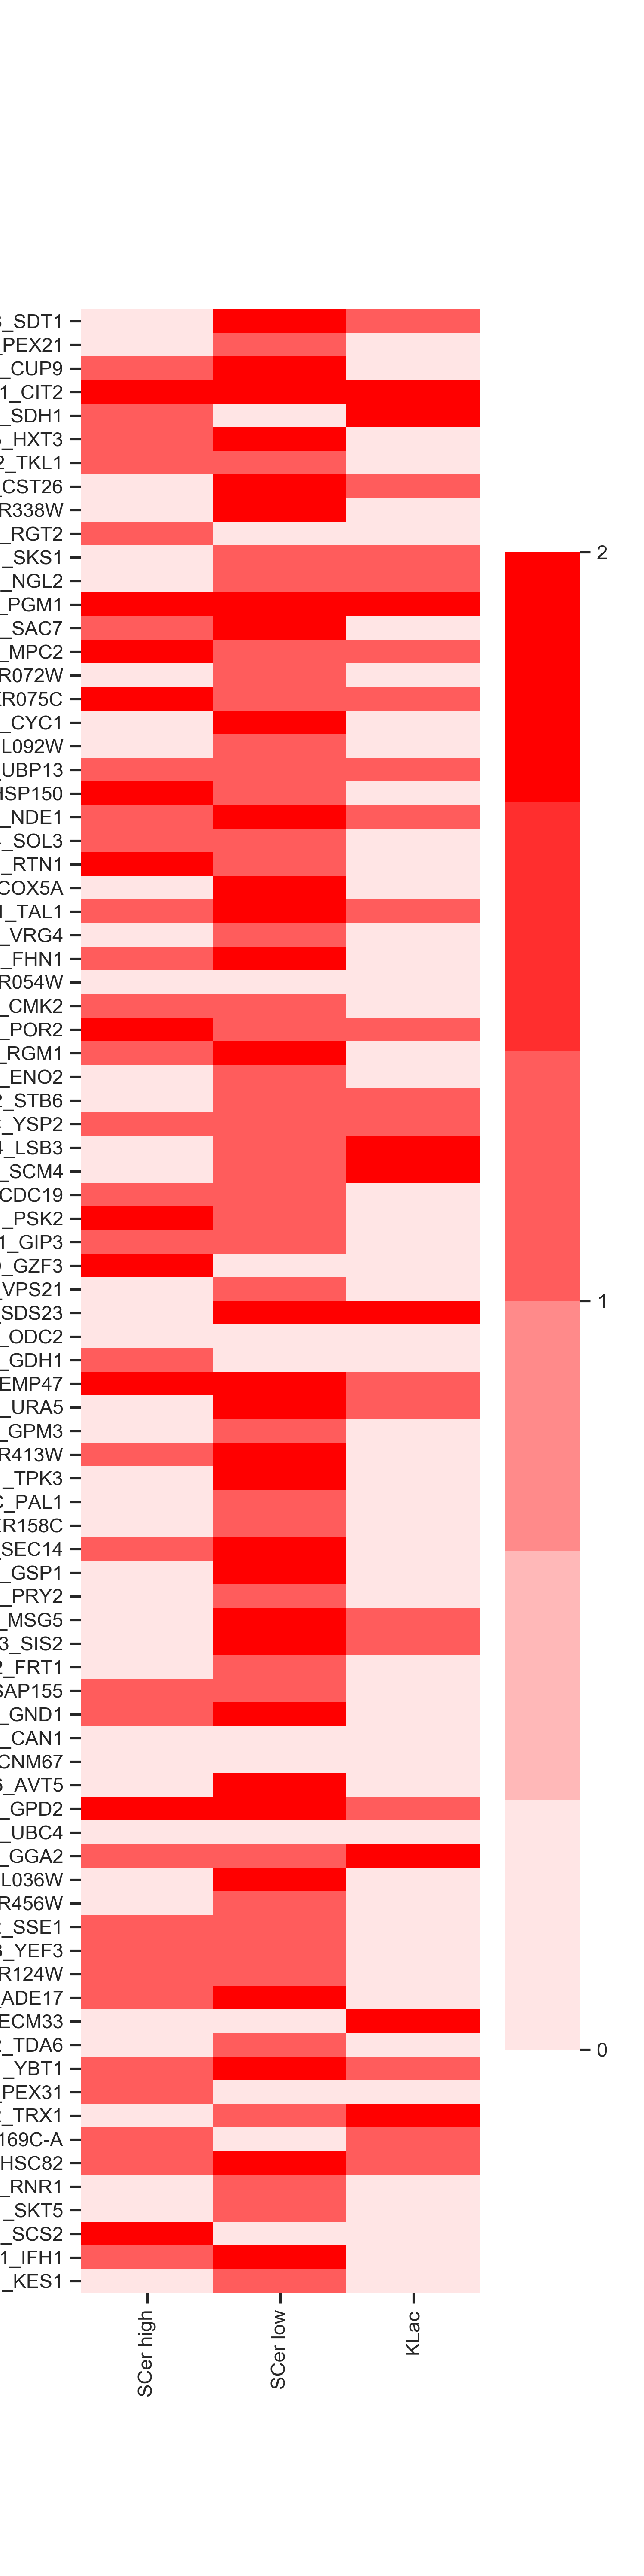

In [72]:
motif = 'STRE'
columns_to_show = [motif + '_count_' + spec_set for spec_set in ['low', 'high', 'kl']]

ohnologs_goi_prom_counts_sorted = ohnologs_goi_prom_counts.loc[new_index, columns_to_show]

fig_STRE, ax_STRE = plt.subplots(figsize=(5,20))

sns.heatmap(ohnologs_goi_prom_counts_sorted, vmax = 2, ax=ax_STRE, cmap=sns.light_palette("red"), cbar_kws={'ticks':[0,1,2]}) #, 'yticklabels':['0', '1', '>1']})

ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(['SCer high', 'SCer low', 'KLac'])

fig_STRE.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/STRE_goi.svg'))
# cbar = fig_STRE.colorbar(ax_STRE, ticks=[0, 1,2])
# cbar.ax.set_yticklabels(['0', '1', '>1'])

## Plot Reduction of LFC in Msn2/4 delete v.s. STRE

In [3]:
#Load DEseq data for SCer PKA AS -/+ NMPP1 
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
pkainh_deseq['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_deseq.index)

#Load DEseq data for SCer PKA AS Msn2/4 delete -/+ NMPP1 
pkainh_m24del_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_M24_nmpp1.csv'), index_col=0)
pkainh_m24del_deseq['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_m24del_deseq.index)

#Merge PKA inh and PKA inh m24del deseq data
pkainh_deseq_merged = pkainh_deseq.merge(pkainh_m24del_deseq, how = 'inner', left_index = True, right_index = True, suffixes=('_WT','_M24'))



In [4]:
#Calculate amont of Msn2/4 reduction

pkainh_deseq_merged['LFC_m24/wt'] = pkainh_deseq_merged['log2FoldChange_M24']/pkainh_deseq_merged['log2FoldChange_WT']

In [5]:
#Load different groups - there are redefined in this script
spec = 'SC'
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181203_r1g1_m24_pka_targets_' + spec + '.pkl'
with open(fname, 'rb') as file:
    [target_sets, coords] = pickle.load(file)
    
#Load GOI ohnolog data

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)


C:\Users\BMH_work\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



(-0.5, 7.5)

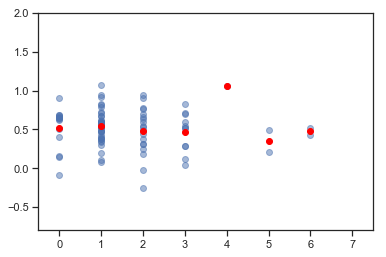

In [30]:

y_column = 'LFC_m24/wt' #'log2FoldChange_WT'   #'LFC_m24/wt'


pkainh_m24_stre = pkainh_deseq_merged.merge(prom_counts['SC']['all_sc_promoters'], how='inner',left_index=True, right_index=True)

#pkainh_subset = pkainh_m24_stre
#pkainh_subset = pkainh_m24_stre.loc[target_sets['pkainh_act'],:]
pkainh_subset = pkainh_m24_stre.loc[set(ohnologs_goi['sc_genename_high']),:]


fig,ax = plt.subplots()


ax.scatter(pkainh_subset['STRE_count'],pkainh_subset[y_column], alpha=0.5)

N_STREs = [N for N in list(set(pkainh_subset['STRE_count'])) if not(np.isnan(N))]
N_STREs.sort()

mean_LFC_m24_wt = []
for N in N_STREs: 
    mean_LFC_m24_wt.append(pkainh_subset.loc[(pkainh_subset['STRE_count']==N), y_column].mean())

ax.scatter(N_STREs, mean_LFC_m24_wt, color='red',alpha=1.0)    


ax.set_ylim(-0.8,2.0)
ax.set_xlim(-0.5,7.5)

In [31]:
pkainh_m24_stre[pkainh_m24_stre['STRE_count']==6.0]

,baseMean_WT,log2FoldChange_WT,lfcSE_WT,stat_WT,pvalue_WT,padj_WT,SC_common_name_WT,baseMean_M24,log2FoldChange_M24,lfcSE_M24,stat_M24,pvalue_M24,padj_M24,SC_common_name_M24,LFC_m24/wt,STRE_count,TATA_count,PDS_count
YMR105C,755.397083,6.785140,0.516470,13.137531,2.006681e-39,7.538824e-38,PGM2,24.209899,2.934352,0.564307,5.199923,1.993712e-07,0.000003,PGM2,0.432467,6,1,0
YML100W,315.138960,7.258455,0.598521,12.127313,7.569230e-34,2.081719e-32,TSL1,7.736815,1.126368,0.721852,1.560386,1.186688e-01,0.314470,TSL1,0.155180,6,3,0
YBR126C,523.680404,4.032209,0.402924,10.007379,1.414502e-23,2.179775e-22,TPS1,52.646891,1.838356,0.543699,3.381204,7.216902e-04,0.005012,TPS1,0.455918,6,2,1
YPL230W,239.723279,5.133590,0.527045,9.740326,2.029018e-22,2.923007e-21,USV1,15.959114,2.679789,0.749103,3.577331,3.471209e-04,0.002653,USV1,0.522011,6,0,0
YGR122W,2.095473,0.084980,1.362255,0.062382,9.502587e-01,9.705200e-01,YGR122W,2.164259,-0.417032,1.302652,-0.320141,7.488614e-01,0.898508,YGR122W,-4.907410,6,1,0


In [ ]:
#STRE isn't really correlating with Msn2 effect
#Perhaps there are downstream effects?
#perhaps there are stres that are in the wrong place here? 

## Same plot for KL data

In [35]:
#Load kl_sc_PKA data

fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)

#Merge LFC data from KL with rest of ohnolog data
ohnologs_goi_kl_data = ohnologs_goi.merge(kl_sc_PKA_data.loc[:,
                    ['N SCer Orthologs', 'kl_genename', 'sc_genename', 'baseMean_KL',
                    'log2FoldChange_KL', 'lfcSE_KL', 'stat_KL', 'pvalue_KL', 'padj_KL']],
                    how='left', left_on = 'sc_genename_high', right_on = 'sc_genename')

#Load different groups - there are redefined in this script
spec = 'KL'
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181203_r1g1_m24_pka_targets_' + spec + '.pkl'
with open(fname, 'rb') as file:
    [target_sets_kl, coords_kl] = pickle.load(file)

In [40]:
set(ohnologs_goi_kl_data['kl_genename'])

{'KLLA0A01155g',
 'KLLA0A01364g',
 'KLLA0A01408g',
 'KLLA0A02607g',
 'KLLA0A02695g',
 'KLLA0A03938g',
 'KLLA0A05390g',
 'KLLA0A05500g',
 'KLLA0A08063g',
 'KLLA0A08360g',
 'KLLA0A09185g',
 'KLLA0A09339g',
 'KLLA0B02607g',
 'KLLA0B06479g',
 'KLLA0B06820g',
 'KLLA0B07205g',
 'KLLA0B07392g',
 'KLLA0B09152g',
 'KLLA0B10450g',
 'KLLA0B10824g',
 'KLLA0B11858g',
 'KLLA0B12694g',
 'KLLA0C00957g',
 'KLLA0C02343g',
 'KLLA0C03762g',
 'KLLA0C04004g',
 'KLLA0C04081g',
 'KLLA0C05126g',
 'KLLA0C05588g',
 'KLLA0C06248g',
 'KLLA0C07887g',
 'KLLA0C11891g',
 'KLLA0C13728g',
 'KLLA0C14454g',
 'KLLA0C15081g',
 'KLLA0C16005g',
 'KLLA0C18238g',
 'KLLA0D01903g',
 'KLLA0D02420g',
 'KLLA0D04444g',
 'KLLA0D05555g',
 'KLLA0D05863g',
 'KLLA0D07073g',
 'KLLA0D07216g',
 'KLLA0D07480g',
 'KLLA0D12100g',
 'KLLA0D12958g',
 'KLLA0D13310g',
 'KLLA0D16280g',
 'KLLA0D19580g',
 'KLLA0E00529g',
 'KLLA0E03081g',
 'KLLA0E03785g',
 'KLLA0E06865g',
 'KLLA0E06931g',
 'KLLA0E12563g',
 'KLLA0E15467g',
 'KLLA0E16347g',
 'KLLA0E16919g

C:\Users\BMH_work\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



(-0.5, 6.5)

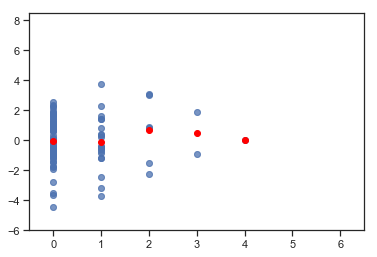

In [48]:

y_column = 'log2FoldChange_KL' #'log2FoldChange_WT'   #'LFC_m24/wt'


pkainh_KL_stre = kl_sc_PKA_data.merge(prom_counts['KL']['all_kl_promoters'], how='inner',left_on='kl_genename', right_index=True)
pkainh_KL_stre.set_index('kl_genename', inplace=True)
#pkainh_subset = pkainh_KL_stre.loc[target_sets_kl['pkainh_act'],:]
pkainh_subset = pkainh_KL_stre.loc[set(ohnologs_goi_kl_data['kl_genename']),:]
#pkainh_subset = pkainh_KL_stre

fig,ax = plt.subplots()


ax.scatter(pkainh_subset['STRE_count'],pkainh_subset[y_column], alpha=0.5)

N_STREs = [N for N in list(set(pkainh_subset['STRE_count'])) if not(np.isnan(N))]
N_STREs.sort()

mean_LFC_m24_wt = []
for N in N_STREs: 
    mean_LFC_m24_wt.append(pkainh_subset.loc[(pkainh_subset['STRE_count']==N), y_column].mean())

ax.scatter(N_STREs, mean_LFC_m24_wt, color='red',alpha=1.0)    


ax.set_ylim(-6,8.5)
ax.set_xlim(-0.5,6.5)